# In this notebook, we will do basic EDA and build ML model to find relationship between the (input=talktime and output=revenue) to estimate what is the revenue a BDE can generate with the talktime.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.ExcelFile('C:\\Users\\Faizal Ahmed\\Desktop\\Personal dox\\Programming training\\Tableau\\Ist Data2.0.xlsx')

In [3]:
Sheet1=df.parse('Sheet1')
Sheet1
df=Sheet1

In [4]:
df.head()

,Category,AVP,Director,AD,SM,EMP ID,Emp email,Emp Name,Designation,Current Status,...,LWD,Pitch(Yday),Pitch (MTD),Total Leads,Total Leads Dialed,Total Leads Contacted,Total Leads Dialed but Not Contacted,NC Leads with 1 Dials (%),NC Leads with 2 Dials (%),NC leads with <3 dials (%)
0,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Biju Krishnan,UN597,mahim.bhatnagar@unacademy.com,Mahim Bhatnagar,BDE,Active,...,NaT,1,0.9167,277.0,277.0,210.0,67.0,0.0,0.0000,0.0000
1,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Megha Mary Shaji,UN477,vikram.singh@unacademy.com,Vikaram Singh Bisht,BDE,Active,...,NaT,1,0.9286,287.0,286.0,229.0,57.0,0.0,0.0070,0.0070
2,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,asha Vinay Sankangoudar,UN975,deepak.singh@unacademy.com,Deepak Singh,BDE,Active,...,NaT,1,0.8966,331.0,331.0,275.0,56.0,0.0,0.0030,0.0030
3,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Asha Vinay Sankangoudar,UN610,prerana.maheshwari@unacademy.com,Prerana Maheshwari,BDE,Active,...,NaT,1,0.8462,264.0,262.0,218.0,44.0,0.0,0.0000,0.0000
4,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Ritesh Krishna Tripathi,UN918,narendra.chauhan@unacademy.com,Narendra Chauhan,BDE,Active,...,NaT,1,1.0000,295.0,295.0,230.0,65.0,0.0,0.0068,0.0068


In [5]:
row,column=df.shape

In [6]:
df[2:5]

,Category,AVP,Director,AD,SM,EMP ID,Emp email,Emp Name,Designation,Current Status,...,LWD,Pitch(Yday),Pitch (MTD),Total Leads,Total Leads Dialed,Total Leads Contacted,Total Leads Dialed but Not Contacted,NC Leads with 1 Dials (%),NC Leads with 2 Dials (%),NC leads with <3 dials (%)
2,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,asha Vinay Sankangoudar,UN975,deepak.singh@unacademy.com,Deepak Singh,BDE,Active,...,NaT,1,0.8966,331.0,331.0,275.0,56.0,0.0,0.0030,0.0030
3,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Asha Vinay Sankangoudar,UN610,prerana.maheshwari@unacademy.com,Prerana Maheshwari,BDE,Active,...,NaT,1,0.8462,264.0,262.0,218.0,44.0,0.0,0.0000,0.0000
4,ACPF,Abhilasha Srivastava,Abhilasha Srivastava,Saif Asghar_AC/PF,Ritesh Krishna Tripathi,UN918,narendra.chauhan@unacademy.com,Narendra Chauhan,BDE,Active,...,NaT,1,1.0000,295.0,295.0,230.0,65.0,0.0,0.0068,0.0068


In [7]:
df.columns[20:30]

Index(['Talk Time (mins)', 'Avg Dials(Y'day)', 'Avg Connects(Y'day)',
       'AHT/Connects (Y'day)', 'Total Leads Dialed\n(Y'day)',
       'Total Leads Connected\n(Y'day)', 'Avg Hrs/day (Talk Time)\nYesterday',
       'Avg Hrs/day (Total Time)\nYesterday', 'Avg Hrs/day (Talk Time)_MTD\n',
       'Avg Hrs/day (Total Time)_MTD'],
      dtype='object')

In [8]:
new_table= df[['Category','Emp Name','Revenue_MTD']]
new_table.head()

,Category,Emp Name,Revenue_MTD
0,ACPF,Mahim Bhatnagar,1105750
1,ACPF,Vikaram Singh Bisht,1119578
2,ACPF,Deepak Singh,1216103
3,ACPF,Prerana Maheshwari,1171944
4,ACPF,Narendra Chauhan,376913


##Find out the max revenue

In [9]:
df['Revenue_MTD'].max()

2138129

In [10]:
df.describe()

,Tenure(Days),Active Mandays,Attendance%,attendance % (MTD),Required Mandays for the month,Req. attendance (MTD),Talk Time (mins),Avg Dials(Y'day),Avg Connects(Y'day),AHT/Connects (Y'day),...,Revenue junLeads,Pitch(Yday),Pitch (MTD),Total Leads,Total Leads Dialed,Total Leads Contacted,Total Leads Dialed but Not Contacted,NC Leads with 1 Dials (%),NC Leads with 2 Dials (%),NC leads with <3 dials (%)
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1326.000000,1326.000000,1372.000000,...,1.547000e+03,1548.00000,1548.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,202.319121,18.188953,0.843346,0.863046,20.825904,20.816214,3972.235788,192.421569,65.367270,3.483309,...,8.194563e+04,0.75969,0.797084,216.435957,212.302469,159.819444,52.586420,0.020286,0.023180,0.043466
std,163.290305,5.188059,0.357089,0.162714,4.583622,4.575550,1368.016550,82.706863,23.953259,1.697866,...,1.137463e+05,0.42741,0.279478,109.075054,107.972474,80.880281,33.388069,0.035229,0.028077,0.054355
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,113.000000,17.500000,1.000000,0.841000,22.000000,22.000000,3327.000000,147.000000,51.000000,2.500000,...,2.348000e+03,1.00000,0.784925,126.750000,125.750000,97.000000,24.000000,0.000000,0.000000,0.005800
50%,134.000000,20.000000,1.000000,0.909000,22.000000,22.000000,4196.500000,193.000000,64.000000,3.300000,...,4.263300e+04,1.00000,0.900000,232.500000,225.500000,162.000000,52.000000,0.006600,0.014050,0.023600
75%,242.000000,21.000000,1.000000,0.955000,22.000000,22.000000,4839.250000,238.000000,79.000000,4.200000,...,1.130370e+05,1.00000,0.961500,300.000000,295.000000,221.250000,74.000000,0.024900,0.033925,0.062200
max,895.000000,27.000000,1.000000,1.227000,26.000000,26.000000,7963.000000,833.000000,216.000000,15.300000,...,1.082756e+06,1.00000,1.000000,523.000000,523.000000,421.000000,196.000000,0.333300,0.196100,0.333300


# Start of the ML model building, to find the relation between Talktime and revenue in UPSC category.


In [11]:
new_df=df[['Revenue_MTD','Talk Time (mins)']][df['Category']=='UPSC'] ## we just need Revenue and talktime to find the relation

In [12]:
new_df ## now we have to analyse with visualization, what is the relationship between them.

,Revenue_MTD,Talk Time (mins)
1356,925520,5347
1357,209196,3222
1358,598256,5220
1359,203977,3997
1360,409269,5377
...,...,...
1543,0,3821
1544,56617,1863
1545,410493,4197
1546,291136,3333


In [13]:
new_df.rename(columns={'Talk Time (mins)': 'Talktime'}, inplace=True) ## modifying the table by renaming the talktime row, for ease.
new_df 

,Revenue_MTD,Talktime
1356,925520,5347
1357,209196,3222
1358,598256,5220
1359,203977,3997
1360,409269,5377
...,...,...
1543,0,3821
1544,56617,1863
1545,410493,4197
1546,291136,3333


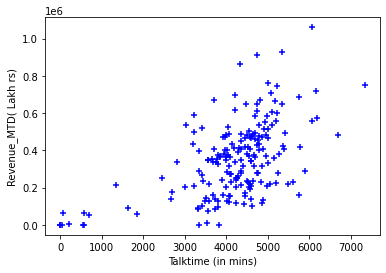

In [30]:
%matplotlib inline

plt.xlabel('Talktime (in mins)')
plt.ylabel('Revenue_MTD( Lakh rs)')
plt.scatter(new_df['Talktime'],new_df['Revenue_MTD'], color='blue',marker='+')

In [20]:
from sklearn import linear_model ## importing linear model 

In [21]:
reg= linear_model.LinearRegression()
reg.fit(new_df[['Talktime']],new_df.Revenue_MTD)

LinearRegression()

In [32]:
reg.predict([[5000]])

C:\Users\Faizal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([428171.83734085])

##### with the above linear regression model, we can predict the 'average revenue' using the 'talktime'
##### reg.coef_= 95.00441913, reg.intercept_=-46850.25830033532, ##Good to know information


##save the file in the pickle

In [33]:
import pickle

In [35]:
with open('model_pickle','wb')as f: 
    pickle.dump(reg,f)

In [36]:
with open('model_pickle','rb')as f:
    tr=pickle.load(f) ## load the file in tr object and then run the model.

In [38]:
tr.predict([[2000]]) ## predicting using the tr object. Hence the load is successfull.

C:\Users\Faizal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([143158.57995614])

In [45]:
##now we can take the input from an external file and the export the result in a csv file.

data1=pd.read_csv('C:\\Users\\Faizal Ahmed\\Desktop\\Personal dox\\Programming training\\Tableau\\talktimedata.csv')

In [44]:
tr.predict(data1)

C:\Users\Faizal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 4641
Feature names seen at fit time, yet now missing:
- Talktime

  warnings.warn(message, FutureWarning)


array([348938.1517879 , 513865.82339452, 378959.54823243, ...,
       351883.28878088, 269799.47065408, 390645.0917852 ])

In [49]:
r=tr.predict(data1)

C:\Users\Faizal Ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 4641
Feature names seen at fit time, yet now missing:
- Talktime

  warnings.warn(message, FutureWarning)


In [53]:
data1['Revenue_MTD']=r

In [54]:
r

array([348938.1517879 , 513865.82339452, 378959.54823243, ...,
       351883.28878088, 269799.47065408, 390645.0917852 ])

In [57]:
data1.to_csv('prediction.csv')

##Hence this is a temporary stop to the model building.
##Future scope:
a. build multifactor prediction model using multiple input metrics such as (lead dials, quality score etc.)
b. as of now I included only upsc category, need to include multiple categories and do the predictions.
c. Data wrangling : Need to find the outliers in the data using BOXPLOT and perfect the data for better predictions.

P.S (There is always scope of improvement and learning. Thank you for viewing my work, your feedbacks are always welcome.)